In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [95]:
class ft_linear_regression:
    
	def __init__(self) -> None:
		# Load data from csv file
		self.data = pd.read_csv('data.csv')
		# Get data into np.array
		self.X = np.array(self.data['km']).reshape(-1, 1)
		self.Y = np.array(self.data['price']).reshape(-1, 1)
		# Scale predictive variable
		self.scales = [0, 0]
		self.X = self.scale(self.X, True)
		# print(self.X)
		# Add intercept feature
		self.X = np.hstack([np.ones_like(self.X), self.X])
        # Initialize parameters, hyperparameters and cost
		self.theta = np.array([[0.0], [0.0]])
		self.m = self.X.shape[0]
		self.cost = []

	def scale(self, X, learning) -> np.array:
		X = X.astype(np.float64)
		# Standardizing data by removing the mean and scaling to unit variance
		if (learning == True):
			self.scales[0] = np.mean(X[:, 0])
			self.scales[1] = np.std(X[:, 0])
		X[:, 0] -= self.scales[0]
		X[:, 0] /= self.scales[1]
		return X
        
	def fit(self, lr=0.1, iter=40) -> None:
		for _ in range(iter):
            # Make predictions based on current parameters
			Y_pred = self.X.dot(self.theta)
            # Calculate cost
			self.cost.append(np.sum((self.Y - Y_pred[:, 0]) ** 2) / self.m)
        	# Update parameters
			self.theta[1] += lr * sum(self.X[:, 1] * (self.Y - Y_pred)[:, 0]) / self.m
			self.theta[0] += lr * sum(self.Y - Y_pred) / self.m
            
	def predict(self, data) -> np.array:
		# Scale new data based on training scaler
		data_scaled = self.scale(data, False)
		# Add intercept feature
		data_trans = np.hstack([np.ones_like(data_scaled), data_scaled])
		# Return predictions
		return data_trans.dot(self.theta)
    
	def plot_data(self) -> None:
        # Plot training data
		plt.scatter(self.data.iloc[:, 0], self.data.iloc[:, 1])
		plt.xlabel(self.data.columns[0])
		plt.ylabel(self.data.columns[1])
        
	def plot_regression(self) -> None:
        # Plot regression coefficients
		plt.scatter(self.data.iloc[:, 0], self.data.iloc[:, 1])
        # Unscaling learned coefficients
		plt.plot(self.data.iloc[:, 0], self.theta[0] - self.theta[1] * np.mean(self.data.iloc[:, 0]) / np.std(self.data.iloc[:, 0]) + self.theta[1] / np.std(self.data.iloc[:, 0]) * self.data.iloc[:, 0], '-', c='r')
		plt.xlabel(self.data.columns[0])
		plt.ylabel(self.data.columns[1])
        
	def plot_cost(self) -> None:
        # Plot cost evolution against training epochs
		plt.plot(self.cost)
		plt.xlabel('epochs')
		plt.ylabel('cost')
        
	def error(self, X, Y) -> float:
        # Calculate error on testing data
		Y_pred = self.predict(X)
		return np.sum(Y - Y_pred[:, 0]) / X.shape[0]

In [96]:
LR = ft_linear_regression()

In [97]:
LR.fit()

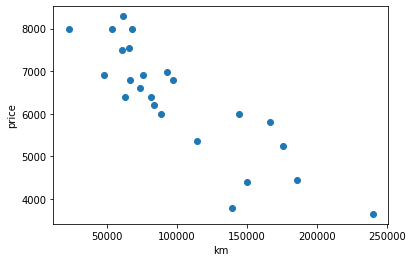

In [98]:
LR.plot_data()

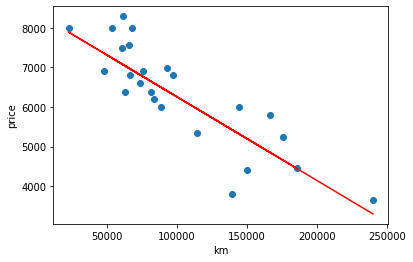

In [99]:
LR.plot_regression()

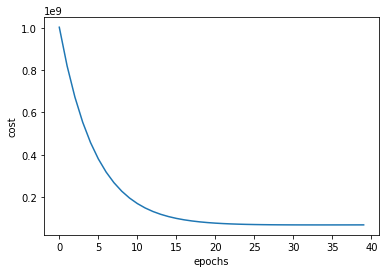

In [100]:
LR.plot_cost()

In [101]:
test = np.array([[150000, 5000], [50000, 7000], [210000, 4000]])

In [102]:
LR.predict(test[:, 0].reshape(-1, 1))

array([[5204.17871671],
       [7317.37161388],
       [3936.26297841]])

In [104]:
LR.error(test[:, 0].reshape(-1, 1), test[:, 1].reshape(-1, 1))

-457.8133090038018